## Overview

Let us suppose that we have a chemical species A in a container of volume $v$ which is subject to the followisng two chemical reactions:
$$
A \stackrel{k_{1}}{\longrightarrow} \emptyset, \quad \quad \emptyset \stackrel{k_{2}}{\longrightarrow} A
$$
In the second reaction, we have the production of chemical A with the rate constant $k_2$ per unit volume. It means that one molecule of A is created during the time interval $[t,t+dt)$ with probability $k_2vdt$. **The impact of other chemical species on the rate of production of A is assumed to be time-independent and is already incorporated in the rate constany** $k_2$

**The rate constants $k_{1}$ and $k_{2}$ have different physical units**. The rate constant $k_{1}$ is expressed in the units of $\left[\sec ^{-1}\right] .$ The units of the rate constant $k_{2}$ are $\left[\mathrm{m}^{-3} \mathrm{sec}^{-1}\right] .$ The scaling with the volume $v$ is natural: **each A molecule degrades independently in the volume,but the production of A depends on the concentration of other species in the volume** $v$. In other words, if we divide the container into two equal parts, the production rate in each part will be half of the production rate in the whole container.

## Simulation algorithm

1. Generate two random numbers $r_{1}, r_{2}$ uniformly distributed in $(0,1) .$

2. Compute $\alpha_{0}=A(t) k_{1}+k_{2} v .$

3. Compute the time when the next chemical reaction takes place as $t+\tau$ where

$$
\tau=\frac{1}{\alpha_{0}} \ln \left[\frac{1}{r_{1}}\right]
$$

4. Compute the number of molecules at time $t+\tau$ by

$$
A(t+\tau)=\left\{\begin{array}{ll}{A(t)+1} & {\text { if } r_{2}<k_{2} v / \alpha_{0}} \\ {A(t)-1} & {\text { if } r_{2} \geq k_{2} v / \alpha_{0}}\end{array}\right.
$$

Then continue with step 1 for time $t+\tau$

## Chemical master equation
**To compute the mean and quantify the stochastic fluctuations**, we again use the chemical master equation.

let $p_{n}(t)$ denote the probability that $A(t)=n$ for $n=0,1,2,3, \ldots$ This time there are three ways we can arrive at $n$ molecules at time $t+\mathrm{d} t:$ 

- there could have been $n$ molecules at time $t$ and no reactions

- there could have been $n+1$ molecules and one was degraded

- there could have been $n-1$ molecules and one was produced.

Thus,

$$
\begin{aligned} p_{n}(t+\mathrm{d} t)=& p_{n}(t) \times\left(1-k_{1} n \mathrm{d} t-k_{2} v \mathrm{d} t\right) \\ &+p_{n+1}(t) \times k_{1}(n+1) \mathrm{d} t+p_{n-1}(t) \times k_{2} v \mathrm{d} t \end{aligned}
$$
$$
\frac{\mathrm{d} p_{n}}{\mathrm{d} t}=k_{1}(n+1) p_{n+1}-k_{1} n p_{n}+k_{2} v p_{n-1}-k_{2} v p_{n}
$$
where $p_{-1} \equiv 0$. **Because of the production reaction, there is no maximum possible number of molecules of A.** Thus, the equation above indeed represents an infinite set of ODEs. To solve this system numerically, we need to truncate ODEs with large $n$, that is, $p_{n} \rightarrow 0$ as $n \rightarrow \infty$.

The mean $M(t)$ and variance $V(t)$ are defined by

$$
M(t)=\sum_{n=0}^{\infty} n p_{n}(t), \quad V(t)=\sum_{n=0}^{\infty}(n-M(t))^{2} p_{n}(t)
$$

Now, let's try to use the chemical master equation to **derive an evolution equation for** $M(t)$. If succeed, we can find $M(t)$ without solving the ODE system. From the master equation, we multiply both sides by $n$ and summing over $n$:

$$
\begin{aligned} \frac{\mathrm{d}}{\mathrm{d} t} \sum_{n=0}^{\infty} n p_{n}=& k_{1} \sum_{n=0}^{\infty} n(n+1) p_{n+1}-k_{1} \sum_{n=0}^{\infty} n^{2} p_{n} \\ &+k_{2} v \sum_{n=1}^{\infty} n p_{n-1}-k_{2} v \sum_{n=0}^{\infty} n p_{n} \end{aligned}
$$

Changing the indices at the first and third term, we have:

$$
\frac{\mathrm{d} M}{\mathrm{d} t}=k_{1} \sum_{n=0}^{\infty}(n-1) n p_{n}-k_{1} \sum_{n=0}^{\infty} n^{2} p_{n}+k_{2} v \sum_{n=0}^{\infty}(n+1) p_{n}-k_{2} v \sum_{n=0}^{\infty} n p_{n}
$$

Combining the terms:

$$
\frac{\mathrm{d} M}{\mathrm{d} t}=-k_{1} \sum_{n=0}^{\infty} n p_{n}+k_{2} v \sum_{n=0}^{\infty} p_{n}
$$

since $\sum_{n=0}^{\infty} p_{n}(t)=1$, we finally arrive at **the evolution eqn.** for $M(t)$:

$$
\frac{\mathrm{d} M}{\mathrm{d} t}=-k_{1} M+k_{2} v
$$

Thus, the solution for $M(t)$ is:

$$
M(t)=\frac{k_{2} v}{k_{1}}+\left(M(0)-\frac{k_{2} v}{k_{1}}\right) \exp \left(-k_{1} t\right)
$$

To calculate the variance, we first write:

$$
\begin{aligned} \frac{\mathrm{d}}{\mathrm{d} t} \sum_{n=0}^{\infty} n^{2} p_{n}=k_{1} & \sum_{n=0}^{\infty} n^{2}(n+1) p_{n+1}-k_{1} \sum_{n=0}^{\infty} n^{3} p_{n} \\ &+k_{2} v \sum_{n=1}^{\infty} n^{2} p_{n-1}-k_{2} v \sum_{n=0}^{\infty} n^{2} p_{n} \end{aligned}
$$

Again, change the indices $n+1 \rightarrow n(\text { resp. } n-1 \rightarrow n)$ and we have:
$$
\frac{\mathrm{d}}{\mathrm{d} t} \sum_{n=0}^{\infty} n^{2} p_{n}=k_{1} \sum_{n=0}^{\infty}\left(-2 n^{2}+n\right) p_{n}+k_{2} v \sum_{n=0}^{\infty}(2 n+1) p_{n}
$$
and,
$$
\frac{\mathrm{d} V}{\mathrm{d} t}+2 M \frac{\mathrm{d} M}{\mathrm{d} t}=-2 k_{1}\left[V+M^{2}\right]+k_{1} M+2 k_{2} v M+k_{2} v
$$
Substitute eqn. for $dM/dt$, we now derive **the evolution equation for the variance** $V(t)$:

$$
\frac{\mathrm{d} V}{\mathrm{d} t}=-2 k_{1} V+k_{1} M+k_{2} v
$$

With the two evolution equation, we can calculate the **steady-state behavior**:
$$
0=-k_{1} M_{s}+k_{2} v \quad \text { and } \quad 0=-2 k_{1} V_{s}+k_{1} M_{s}+k_{2} v
$$
Consequently,
$$
M_{s}=V_{s}=\frac{k_{2} v}{k_{1}}
$$

More detailed information about the fluctuations is given by the so-called **stationary distribution** $\phi(n), n=0,1,2,3, \ldots,$ which is defined as:
$$
\phi(n)=\lim _{t \rightarrow \infty} p_{n}(t)
$$

One way to compute $\phi(n)$ is to run the algorithm for a long time and compute the histogram of values of $A(t)$. An alternative way to compute $\phi(n)$ is to **use the steady-state version of the chemical master equation,** namely:

$$
\begin{array}{l}{0=k_{1} \phi(1)-k_{2} v \phi(0)} \\ {0=k_{1}(n+1) \phi(n+1)-k_{1} n \phi(n)+k_{2} v \phi(n-1)-k_{2} v \phi(n), \quad \text { for } n \geq 1}\end{array}
$$
Which implies,

$$
\begin{aligned} \phi(1) &=\frac{k_{2} v}{k_{1}} \phi(0) \\ \phi(n+1) &=\frac{1}{k_{1}(n+1)}\left[k_{1} n \phi(n)+k_{2} v \phi(n)-k_{2} v \phi(n-1)\right], \quad \text { for } n \geq 1 \end{aligned}
$$

Because $\sum_{n=0}^{\infty} \phi(n)=1$, we can **first set $\phi(0)=1$ and compute $\phi(n),$ for sufficiently many $n$. Then normalize by dividing each $\phi(n)$ by $\sum \phi(n)$**. We can verify that the solution the the equations above can be written as:

$$
\phi(n)=\frac{1}{n !}\left(\frac{k_{2} v}{k_{1}}\right)^{n} \exp \left[-\frac{k_{2} v}{k_{1}}\right]
$$

**Considering initial condition $A(0)=0$, we can also show that the time-dependent solution, $p_{n}(t),$ of the corresponding
chemical master equation is given by the Poisson distribution with mean $M(t)$ for all times $t>0 .$**

If we consider a general initial condition, where $M(0) \neq V(0),$ then an analytical formula for $p_{n}(t)$ could be found using the approach of Jahnke and Huisinga $(2007)$ [here](https://link.springer.com/article/10.1007/s00285-006-0034-x). but it would **no longer be a simple Poisson distribution**.

In [6]:
import numpy as np
from numpy.random import uniform
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

def degr_prod(A0, k1, k2v, T):
    tlst = [0]
    count = [A0]
    while tlst[-1]<T:
        r1,r2 = uniform(size=2)
        if count[-1]==0:
            a0 = k2v
            p_prod = 1
        else:
            a0 = count[-1]*k1+k2v
            p_prod = k2v/a0
        tau = 1/a0*np.log(1/r1)
        tlst.append(tau+tlst[-1])
        if r2<p_prod:
            count.append(count[-1]+1)
        else:
            count.append(count[-1]-1)
            
    return tlst,count

Text(0, 0.5, 'Concentration')

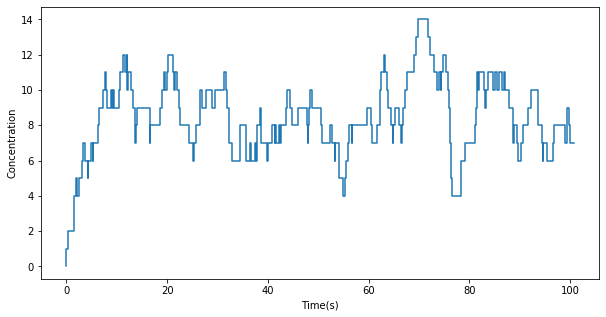

In [7]:
Ainit = 0
k_degr = 0.1
k_prod = 1
Tscal = 100 # in second
tsim,csim = degr_prod(Ainit, k_degr, k_prod, Tscal)
plt.step(tsim,csim)
plt.xlabel('Time(s)')
plt.ylabel('Concentration')

**Now, let's check the stationary distribution**

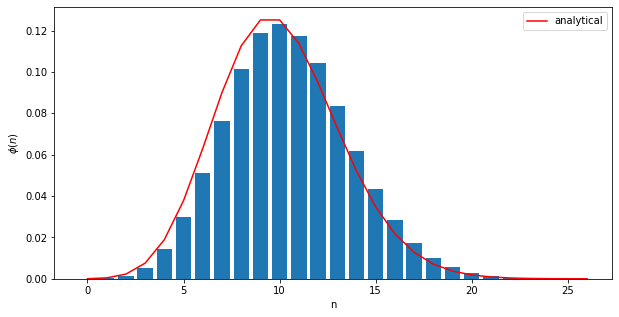

In [17]:
from collections import Counter
from scipy.special import factorial as f
Tscal = 100000 # in second
_,csim = degr_prod(Ainit, k_degr, k_prod, Tscal)
cdict = Counter(csim)
ckey = list(cdict.keys())
cval = list(cdict.values())
cval =np.array(cval)/np.sum(cval)
analytical = [1/f(n)*((k_prod/k_degr)**n)*np.exp(-k_prod/k_degr) for n in range(max(ckey)+2)]
plt.bar(ckey,cval)
plt.plot(list(range(max(ckey)+2)),analytical,'r-',label='analytical')
plt.xlabel('n')
plt.ylabel('$\phi(n)$')
plt.legend()